# HAR03 - Human Activity Recognition (Module II of ENGSCI712)

## Splitting of time-series

In [1]:
import pandas as pd

In [2]:
t = pd.date_range(start='2020-09-23 15:00',
             end='2020-09-23 15:02', 
              periods=120*100+1)
t[:10]

DatetimeIndex([       '2020-09-23 15:00:00', '2020-09-23 15:00:00.010000',
               '2020-09-23 15:00:00.020000', '2020-09-23 15:00:00.030000',
               '2020-09-23 15:00:00.040000', '2020-09-23 15:00:00.050000',
               '2020-09-23 15:00:00.060000', '2020-09-23 15:00:00.070000',
               '2020-09-23 15:00:00.080000', '2020-09-23 15:00:00.090000'],
              dtype='datetime64[ns]', freq=None)

In [3]:
df = pd.DataFrame(index=t)
df.head()

""
2020-09-23 15:00:00.000
2020-09-23 15:00:00.010
2020-09-23 15:00:00.020
2020-09-23 15:00:00.030
2020-09-23 15:00:00.040


In [4]:
df.index

DatetimeIndex([       '2020-09-23 15:00:00', '2020-09-23 15:00:00.010000',
               '2020-09-23 15:00:00.020000', '2020-09-23 15:00:00.030000',
               '2020-09-23 15:00:00.040000', '2020-09-23 15:00:00.050000',
               '2020-09-23 15:00:00.060000', '2020-09-23 15:00:00.070000',
               '2020-09-23 15:00:00.080000', '2020-09-23 15:00:00.090000',
               ...
               '2020-09-23 15:01:59.910000', '2020-09-23 15:01:59.920000',
               '2020-09-23 15:01:59.930000', '2020-09-23 15:01:59.940000',
               '2020-09-23 15:01:59.950000', '2020-09-23 15:01:59.960000',
               '2020-09-23 15:01:59.970000', '2020-09-23 15:01:59.980000',
               '2020-09-23 15:01:59.990000',        '2020-09-23 15:02:00'],
              dtype='datetime64[ns]', length=12001, freq=None)

In [5]:
delta_t = df.index - df.index[0]
delta_t[:10]

TimedeltaIndex([       '00:00:00', '00:00:00.010000', '00:00:00.020000',
                '00:00:00.030000', '00:00:00.040000', '00:00:00.050000',
                '00:00:00.060000', '00:00:00.070000', '00:00:00.080000',
                '00:00:00.090000'],
               dtype='timedelta64[ns]', freq=None)

In [6]:
df['seconds'] = delta_t.seconds + delta_t.microseconds/1e6
df.head()

,seconds
2020-09-23 15:00:00.000,0.00
2020-09-23 15:00:00.010,0.01
2020-09-23 15:00:00.020,0.02
2020-09-23 15:00:00.030,0.03
2020-09-23 15:00:00.040,0.04


In [7]:
df.tail()

,seconds
2020-09-23 15:01:59.960,119.96
2020-09-23 15:01:59.970,119.97
2020-09-23 15:01:59.980,119.98
2020-09-23 15:01:59.990,119.99
2020-09-23 15:02:00.000,120.00


In [8]:
import numpy as np

df['signal'] = np.sin(df.seconds/10 * 2 * np.pi)
df.head()

,seconds,signal
2020-09-23 15:00:00.000,0.00,0.000000
2020-09-23 15:00:00.010,0.01,0.006283
2020-09-23 15:00:00.020,0.02,0.012566
2020-09-23 15:00:00.030,0.03,0.018848
2020-09-23 15:00:00.040,0.04,0.025130


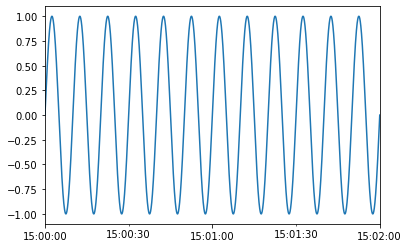

In [9]:
df.signal.plot()

In [10]:
df2 = df.reset_index()
df2.head()

,index,seconds,signal
0,2020-09-23 15:00:00.000,0.00,0.000000
1,2020-09-23 15:00:00.010,0.01,0.006283
2,2020-09-23 15:00:00.020,0.02,0.012566
3,2020-09-23 15:00:00.030,0.03,0.018848
4,2020-09-23 15:00:00.040,0.04,0.025130


In [11]:
np.round(df2.index / 500)

Float64Index([ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,
              ...
              24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0],
             dtype='float64', length=12001)

In [12]:
window_idx = np.asarray(np.floor(df2.index / 100).values,
                       np.int)
window_idx

array([  0,   0,   0, ..., 119, 119, 120])

In [13]:
df['window_idx'] = ['s{:03}'.format(idx) for idx in window_idx]
df.head()

,seconds,signal,window_idx
2020-09-23 15:00:00.000,0.00,0.000000,s000
2020-09-23 15:00:00.010,0.01,0.006283,s000
2020-09-23 15:00:00.020,0.02,0.012566,s000
2020-09-23 15:00:00.030,0.03,0.018848,s000
2020-09-23 15:00:00.040,0.04,0.025130,s000


In [14]:
df.groupby('window_idx').count()

,seconds,signal
window_idx,,
s000,100,100
s001,100,100
s002,100,100
s003,100,100
s004,100,100
...,...,...
s116,100,100
s117,100,100
s118,100,100


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

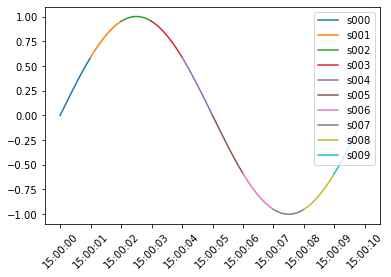

In [16]:
for idx in np.unique(df.window_idx)[:10]:
    plt.plot(df.signal[df.window_idx == idx], label=idx)
plt.xticks(rotation=45)
plt.legend()

In [17]:
df.head()

,seconds,signal,window_idx
2020-09-23 15:00:00.000,0.00,0.000000,s000
2020-09-23 15:00:00.010,0.01,0.006283,s000
2020-09-23 15:00:00.020,0.02,0.012566,s000
2020-09-23 15:00:00.030,0.03,0.018848,s000
2020-09-23 15:00:00.040,0.04,0.025130,s000


In [18]:
from tsfresh.feature_extraction import extract_features

X = extract_features(df, column_id='window_idx', column_sort='seconds')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.75it/s]


In [19]:
X.head()

variable,signal__abs_energy,signal__absolute_sum_of_changes,"signal__agg_autocorrelation__f_agg_""mean""__maxlag_40","signal__agg_autocorrelation__f_agg_""median""__maxlag_40","signal__agg_autocorrelation__f_agg_""var""__maxlag_40","signal__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","signal__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","signal__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","signal__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","signal__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,signal__symmetry_looking__r_0.9,signal__symmetry_looking__r_0.9500000000000001,signal__time_reversal_asymmetry_statistic__lag_1,signal__time_reversal_asymmetry_statistic__lag_2,signal__time_reversal_asymmetry_statistic__lag_3,signal__value_count__value_-1,signal__value_count__value_0,signal__value_count__value_1,signal__variance,signal__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
s000,11.986416,0.582690,0.480087,0.507826,0.107379,0.063363,0.999596,0.058681,0.000590,0.303035,...,1.0,1.0,0.002656,0.005280,0.007872,0.0,1.0,0.0,0.029252,0.0
s001,64.174406,0.361311,0.475606,0.502824,0.108749,0.651335,0.993363,0.035300,0.001445,0.805308,...,1.0,1.0,0.008796,0.017658,0.026584,0.0,0.0,0.0,0.011378,0.0
s002,96.773849,0.095964,0.092418,0.075024,0.261142,0.987039,0.040970,0.000169,0.001458,0.999980,...,1.0,1.0,0.000071,0.000142,0.000214,0.0,0.0,1.0,0.000214,0.0
s003,64.733423,0.358200,0.475481,0.502684,0.108787,0.971075,-0.993184,-0.034977,0.001451,0.951057,...,1.0,1.0,-0.008796,-0.017659,-0.026585,0.0,0.0,0.0,0.011187,0.0
s004,12.331907,0.581502,0.480075,0.507813,0.107382,0.596720,-0.999580,-0.058549,0.000600,0.587785,...,1.0,1.0,-0.002727,-0.005423,-0.008088,0.0,0.0,0.0,0.029133,0.0


In [20]:
t = df.groupby('window_idx').seconds.max()

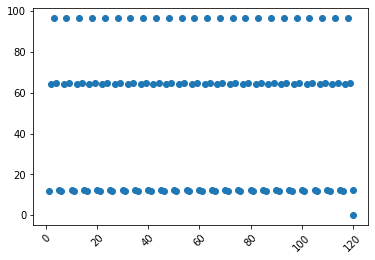

In [21]:
plt.plot(t, X['signal__abs_energy'], 'o')
_ = plt.xticks(rotation=45)

## Random Forest Classifier

## Create time-series classification problem

In [22]:
df['diff'] = df['signal'].diff()

In [23]:
df2 = df.copy()

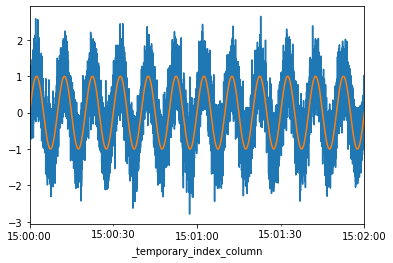

In [24]:
df2['signal'] = df['signal'] + 0.5*np.random.randn(df.shape[0])
df2.signal.plot()
df.signal.plot()

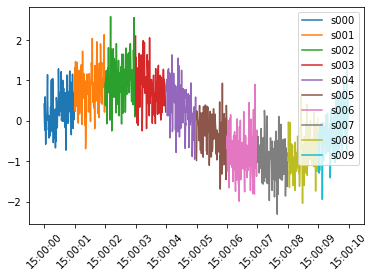

In [25]:
for idx in np.unique(df.window_idx)[:10]:
    plt.plot(df2.signal[df.window_idx == idx], label=idx)
plt.xticks(rotation=45)
plt.legend()

In [26]:
df2.head()

,seconds,signal,window_idx,diff
_temporary_index_column,,,,
2020-09-23 15:00:00.000,0.00,0.419331,s000,NaN
2020-09-23 15:00:00.010,0.01,0.006357,s000,0.006283
2020-09-23 15:00:00.020,0.02,-0.225259,s000,0.006283
2020-09-23 15:00:00.030,0.03,0.594541,s000,0.006282
2020-09-23 15:00:00.040,0.04,-0.030540,s000,0.006282


In [27]:
X = extract_features(df2[['signal', 'window_idx', 'seconds']], column_id='window_idx', column_sort='seconds')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 18/18 [00:06<00:00,  2.66it/s]


In [28]:
y = df.groupby('window_idx')['diff'].mean() > 0
y

window_idx
s000     True
s001     True
s002     True
s003    False
s004    False
        ...  
s116    False
s117    False
s118     True
s119     True
s120     True
Name: diff, Length: 121, dtype: bool

In [29]:
from tsfresh.transformers import FeatureSelector

In [30]:
select = FeatureSelector()
select.fit(X.dropna(axis=1), y)

FeatureSelector(chunksize=None, fdr_level=0.05, hypotheses_independent=False,
                ml_task='auto', n_jobs=4,
                test_for_binary_target_binary_feature='fisher',
                test_for_binary_target_real_feature='mann',
                test_for_real_target_binary_feature='mann',
                test_for_real_target_real_feature='kendall')

In [31]:
select.relevant_features

['signal__linear_trend__attr_"rvalue"',
 'signal__linear_trend_timewise__attr_"rvalue"',
 'signal__first_location_of_minimum',
 'signal__last_location_of_minimum',
 'signal__last_location_of_maximum',
 'signal__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0',
 'signal__first_location_of_maximum',
 'signal__time_reversal_asymmetry_statistic__lag_3',
 'signal__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_10',
 'signal__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20',
 'signal__time_reversal_asymmetry_statistic__lag_2',
 'signal__quantile__q_0.1',
 'signal__quantile__q_0.2',
 'signal__median',
 'signal__quantile__q_0.4']

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features=5)
clf.fit(X[select.relevant_features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(FeatureSelector(), RandomForestClassifier())


In [34]:
from sklearn.model_selection import RepeatedKFold

kf = RepeatedKFold(n_splits=10, n_repeats=10)

Xd = X.dropna(axis=1)
predictions = list()
truth = list()
for train, test in kf.split(Xd):
    model.fit(Xd.iloc[train], y.iloc[train])
    predictions.append(model.predict_proba(Xd.iloc[test]))
    truth.append(y.iloc[test])

121

In [35]:
p = np.concatenate(predictions)
t = np.concatenate(truth)
p.shape, t.shape

((1210, 2), (1210,))

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(t, p[:,1])
         

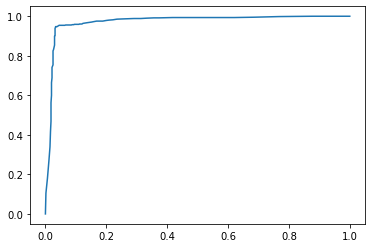

In [37]:
plt.plot(fpr, tpr)